In [2]:
## most up to date version of code that scans for forward and reverse binding sites
## imports the table of genes
import numpy as np
import pandas as pd
dna_sequences = pd.read_csv(input(), delimiter=',')
dna_sequences

gstd1.csv


,gene,upstream
0,gstd1,gagcccacttttataggggccggctgtggtcgccacaatgccggca...


In [4]:
## choses dictionary with pfm for code 
print('Input transcription factor name')
factor = input()
if factor.upper() == 'ATF4':
    profile = {'A': [210, 169, 639, 0, 19, 888, 2, 1, 40, 879, 888, 0, 414], 'C': [71, 117, 202, 0, 0, 0, 372, 0, 838, 21, 3, 266, 272], 'G': [442, 409, 127, 7, 1090, 0, 9, 1104, 16, 0, 1, 62, 101], 'T': [170, 213, 3, 981, 11, 25, 470, 4, 113, 3, 4, 714, 78]}
    ## make revcomp profile
elif factor.upper() == 'XBP1':
    profile = {'A': [4396, 3270, 1104, 974, 3699, 167, 7840, 9, 52, 0, 380, 8004, 230, 989], 'C': [558, 1017, 1191, 367, 3809, 7169, 17, 7356, 0, 16, 7264, 48, 2273, 6313], 'G': [801, 2413, 2669, 9168, 59, 222, 276, 2, 11353, 8, 47, 173, 3157, 1217], 'T': [2467, 1780, 3999, 2321, 247, 442, 118, 10, 10, 9107, 35, 92, 6389, 1250]}
    ## make revcomp profile
elif factor.upper() =='ATF6':
    profile = {'A': [0, 0, 20, 0, 0, 0, 0, 2], 'C': [0, 0, 0, 20, 0, 0, 2, 0], 'G': [0, 20, 0, 0, 20, 0, 18, 18], 'T': [20, 0, 0, 0, 0, 20, 0, 0]}
    profilerevcomp = {'T': [2, 0, 0, 0, 0, 20, 0, 0], 'G': [0, 2, 0, 0, 20, 0, 0, 0], 'C': [18, 18, 0, 20, 0, 0, 20, 0], 'A': [0, 0, 20, 0, 0, 0, 0, 20]}
elif factor.upper() =='XRP1':
    profile = {'A': [0.252, 0.178, 0.468, 0.001, 0.001, 0.59, 0.997, 0.997, 0.082, 0.305], 'C': [0.046, 0.089, 0.001, 0.56, 0.001, 0.275, 0.001, 0.001, 0.213, 0.287], 'G': [0.078, 0.344, 0.362, 0.011, 0.997, 0.001, 0.001, 0.001, 0.001, 0.176], 'T': [0.624, 0.389, 0.169, 0.428, 0.001, 0.134, 0.001, 0.001, 0.704, 0.232]}
    profilerevcomp = {'T': [0.305, 0.082, 0.997, 0.997, 0.59, 0.001, 0.001, 0.468, 0.178, 0.252], 'G': [0.287, 0.213, 0.001, 0.001, 0.275, 0.001, 0.56, 0.001, 0.089, 0.046], 'C': [0.176, 0.001, 0.001, 0.001, 0.001, 0.997, 0.011, 0.362, 0.344, 0.078], 'A': [0.232, 0.704, 0.001, 0.001, 0.134, 0.001, 0.428, 0.169, 0.389, 0.624]}
## allows user to input transcription factor 
else:
    print('Enter position frequency matrix scores for A in the format 3 4 5:')
    item1 = [float(x) for x in input().split()]
    print('Enter position frequency matrix scores for C in the format 3 4 5:')
    item2 = [float(x) for x in input().split()]
    print('Enter position frequency matrix scores for G in the format 3 4 5:')
    item3 = [float(x) for x in input().split()]
    print('Enter position frequency matrix scores for T in the format 3 4 5:')
    item4 = [float(x) for x in input().split()]
    profile = {'A':item1, 'C': item2, 'G': item3, 'T': item4}
    profilerevcomp = {'T':item1[::-1], 'G': item2[::-1], 'C': item3[::-1], 'A': item4[::-1]}
    

Input transcription factor name
xrp1



gstd1


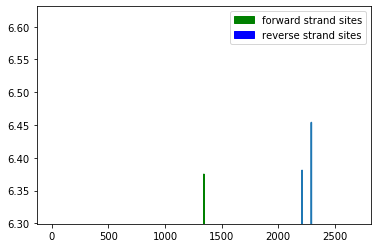

gagcccacttttataggggccggctgtggtcgccacaatgccggcaaacaagagttgtagcttgaagcgccccgcggggcgtggcaaggtggggagagaggtacagagagagagagagggggctgctagttgttgtcgtgcctgggttttttttttgtcttctattatattctgacttgcccacacatacccactaatggcgggcaaaaatgtgacgttagcggcgtgattaatacactgttgtgtggccatgggtgtgtggagacgattgatagtgtgtgtgtgcgtgctctggaggaggttgcactctatccgttccctcatacacctccaccatacccccgcaaaagaaagctgcaactttctaatgatcctccattggaacgaagccttttactcgcttaagaacaaattttgttacatttctttataatttctgattttaacaaacagataacaaagaagatacaatcctgccatacaggtattattaatcgtagggtatttacacatcgacttgctaagattagcaaacacataagcatgcaatcgattagcttgaaacacaattttgcatttctaatgaacatctgtgcgcctgaaaaaacataaattcttttaaaatgcaaaaaaaaataagtacaaacaaataagcaggcaaacagaaaccagataagaattcaagccggccggcaaacattgatatcaggcaaacatatatgtatgtatgtacatatgtacatatatagcaacagttgtcgagtatttccaacacacaagcaaatcgcgaaaggctcataccgtactaataagaccataaaaatataaccgtttttcgaattattcaatatactttgactcatagtaataattttaatgggtaagcccaagctatggtagacaaatagtagtagattaaatgatgagtcaaaggcacatgcaaattcgaaattactggtacacattttcaatgtaacaatatggatgggcttagtccata

In [7]:
from termcolor import colored 
from colorama import Fore
from colorama import Style
from matplotlib import pyplot
import matplotlib.patches as mpatches
import re
## goes through DNA sequences in data frame and analyzes each
## manually change 'intron' or 'gene' to the heading of the column in the spreadsheet that you want to look at
bestscores = []
for i in range(len(dna_sequences.upstream)):
    ## accesses sequences from spreadsheet 
    DNA = dna_sequences.upstream[i].lower()
    gene = dna_sequences.gene[i]
    print('\n' + Fore.RED + '\033[5m' + gene)
    ## reads DNA sequence, creates scores for each
    def transcription_factor (seq, profile):
        width = len(profile['T'])
        bindingscore = []
        for i in range(len(seq)-width):
            score = 0
            for j in range(width):
                letter = seq[i+j]
                score += profile[letter][j]
            bindingscore.append (score)
        return bindingscore
    ## max binding score etc 
    upperseq = DNA.upper()
    bindingscores = transcription_factor(upperseq, profile)
    revcompbindingscores = transcription_factor (upperseq, profilerevcomp)
    max_binding_list = []
    for i in range(len(profile['A'])):
        my_list = []
        my_list.append(profile['A'][i])
        my_list.append(profile['C'][i])
        my_list.append(profile['G'][i])
        my_list.append(profile['T'][i])
        max_binding_list.append(max(my_list))
    max_score = sum(max_binding_list)
    ## generates figures 
    pyplot.plot (revcompbindingscores)
    pyplot.ylim (0.95 * max_score, max_score)
    pyplot.plot (bindingscores, "green")
    pyplot.ylim (0.95 * max_score, max_score)
    green_patch = mpatches.Patch(color='green', label='forward strand sites')
    blue_patch = mpatches.Patch(color='blue', label='reverse strand sites')
    pyplot.legend(handles=[green_patch, blue_patch])
    pyplot.show()
    ## presents binding site information 
    forsites = []
    forscores = []
    forpairs = []
    revsites = []
    revscores = []
    revpairs = []
    def binding_sites (binding, sites, scores, pairs): 
        for i in range (len(binding)):
            if binding[i] > 0.95 * max_score: 
                sequence = DNA[i:i + len(profile['A'])]
                sites.append(sequence)
                pair = sequence.upper() + ': ' + str(bindingscores[i])
                pairs.append(str(pair))
                number = bindingscores[i]
                scores.append(number)
        return sites, scores, pairs 
    binding_sites(bindingscores, forsites, forscores, forpairs)
    binding_sites(revcompbindingscores, revsites, revscores, revpairs)
    ## the function and loop below should accurately replace all revcomp binding sites with their capital counterpart
    fordict = {}
    revdict = {}
    def dict_create(newdict, sites):
        for i in range (len(sites)):
            d1 = {str(i): sites[i].upper()}
            newdict.update(d1)
        return newdict
    ## attempting to scan newDNA to put in the revcomp transcription factor binding sites as well 
    dict_create(fordict, forsites)
    dict_create(revdict, revsites)
    def replace_all(text, dic, sites, color):
        for i, j in zip(range (len(sites)), dic.values()):
            text = text.replace(sites[i], colored(str(j), color, attrs=['bold']))
        return text
    newDNA = replace_all(DNA, fordict, forsites, 'green')
    finalDNA = replace_all(newDNA, revdict, revsites, 'blue')
    print(finalDNA)
    ##presents binding scores for both original and revcomp
    allsites = forsites + revsites
    print('\n' + Fore.RED + '\033[5m' + str(len(allsites)) + ' binding scores')
    ##scores = revscores + forscores
    ##sortedscores = sorted(scores, reverse = True)
    ##if len(sortedscores) > 0:
        ##highestscore = max(sortedscores)
        ##bestpair = gene + ": " + str(highestscore)
        ##bestscores.append(bestpair)
##print('\n' + Fore.BLUE + '\033[5m' + 'Highest Scores:' + Fore.RED + '\n')
##print('\n'.join(bestscores))

